# Практическое задание к Уроку 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
# функция, определяющая среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [3]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [4]:
data

array([[ 0.37879447, -0.61837549],
       [-0.65293115, -1.06706712],
       [-1.06581629, -0.34682333],
       ...,
       [ 1.19451016,  1.00147133],
       [ 0.1256231 ,  0.35261274],
       [-0.05674652,  0.41214611]])

#### Градиентный спуск

In [5]:
X = data.copy()
Y = target.copy()

# начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_gs = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# начальная разница весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_gs.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В результате выполнения градиентного спуска функционал ошибки = {round(errors_gs[-1], 4)}')
print(f'Количество выполненных итераций = {iter_num}')

В результате выполнения градиентного спуска функционал ошибки = 26.4259
Количество выполненных итераций = 986


#### Стохастический градиентный спуск

In [6]:
data = data.copy()
target = target.copy()
# начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgs = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# начальная разница весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_sgs.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В результате выполнения стохастического градиентного спуска функционал ошибки = {round(errors_sgs[-1], 4)}')
print(f'Количество выполненных итераций = {iter_num}')

В результате выполнения стохастического градиентного спуска функционал ошибки = 457.0203
Количество выполненных итераций = 75746


Text(0, 0.5, 'MSE')

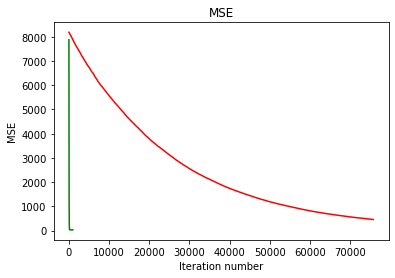

In [7]:
# Визуализация изменения функционала ошибки
plt.plot(range(len(errors_gs)), errors_gs, color='g')
plt.plot(range(len(errors_sgs)), errors_sgs, color='r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Вывод:** Количество итераций по градиентному спуску на 2 порядка меньше (986 и 75746), чем по стохастическому градиентному спуску для обеспечения той же разницы весов (1e-8). Соответственно, сходимость стохастического градиентного спуска хуже.

## 2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

f(x, W) + (lambda_/2) * np.sum(W**2) # Ridge - L2 регуляризация

df/dw1 = d(w1**2 + w2**2 + w3**2) / dw1 = 2*w1 + 0 + 0 = 2*w1

In [8]:
# from sklearn.linear_model import LinearRegression, SGDClassifier, SGDRegressor
from sklearn.linear_model import Ridge

In [9]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    # 
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # формат
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [10]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)
data

array([[ 0.37879447, -0.61837549],
       [-0.65293115, -1.06706712],
       [-1.06581629, -0.34682333],
       ...,
       [ 1.19451016,  1.00147133],
       [ 0.1256231 ,  0.35261274],
       [-0.05674652,  0.41214611]])

#### Градиентный спуск

In [11]:
X = data.copy()
Y = target.copy()

# начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_gs = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# начальная разница весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_gs.append(ridge_regression(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В результате выполнения градиентного спуска функционал ошибки = {round(errors_gs[-1], 4)}')
print(f'Количество выполненных итераций = {iter_num}')

IndexError: arrays used as indices must be of integer (or boolean) type

#### Стохастический градиентный спуск

In [12]:
data = data.copy()
target = target.copy()
# начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgs = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# начальная разница весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_sgs.append(ridge_regression(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В результате выполнения стохастического градиентного спуска функционал ошибки = {round(errors_sgs[-1], 4)}')
print(f'Количество выполненных итераций = {iter_num}')

IndexError: arrays used as indices must be of integer (or boolean) type

## 3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

f(x, W) + (lambda_/2) * np.sum(np.abs(W)) # Lasso - L1 регуляризация

In [13]:
from sklearn.linear_model import Lasso

In [14]:
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # формат
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [15]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)
data

array([[ 0.37879447, -0.61837549],
       [-0.65293115, -1.06706712],
       [-1.06581629, -0.34682333],
       ...,
       [ 1.19451016,  1.00147133],
       [ 0.1256231 ,  0.35261274],
       [-0.05674652,  0.41214611]])

#### Градиентный спуск

In [16]:
X = data.copy()
Y = target.copy()

# начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_gs = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# начальная разница весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_gs.append(lasso_regression(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В результате выполнения градиентного спуска функционал ошибки = {round(errors_gs[-1], 4)}')
print(f'Количество выполненных итераций = {iter_num}')

IndexError: arrays used as indices must be of integer (or boolean) type

#### Стохастический градиентный спуск

In [17]:
data = data.copy()
target = target.copy()
# начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgs = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# начальная разница весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_sgs.append(lasso_regression(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В результате выполнения стохастического градиентного спуска функционал ошибки = {round(errors_sgs[-1], 4)}')
print(f'Количество выполненных итераций = {iter_num}')

IndexError: arrays used as indices must be of integer (or boolean) type

#### Выводы:

1. Ключевое отличие

**Ridge:** Включает в себя все (или ни одного) из функций модели. Таким образом, основным преимуществом регрессии Ridge является уменьшение коэффициента сжатия и снижение сложности модели.

**Lasso:** Наряду с коэффициентами сжатия Lasso также выполняет выбор функций. Некоторые коэффициенты становятся равными нулю, что эквивалентно исключению конкретной функции из модели.
Традиционно для выбора объектов и создания экономных моделей использовались такие методы, как пошаговая регрессия. Но с достижениями в области машинного обучения регрессия Ridge и Lasso предоставляет очень хорошие альтернативы, поскольку они дают гораздо лучшую производительность, требуют меньшего количества параметров настройки и могут быть в значительной степени автоматизированы.


2. Типичные Случаи Использования

**Ridge:** В основном используется для предотвращения переобучения, поскольку включает в себя все функции, он не очень полезен в случае чрезмерно высоких #функций, скажем, в миллионах, поскольку это создаст вычислительные проблемы.

**Lasso:** Поскольку он предоставляет разреженные решения, это, как правило, модель выбора (или какой-либо вариант этой концепции) для моделирования случаев, когда #функций насчитывается миллионы или более. В таком случае получение разреженного решения имеет большое вычислительное преимущество, поскольку функции с нулевыми коэффициентами можно просто игнорировать.
Нетрудно понять, почему методы пошагового выбора становятся практически очень громоздкими для реализации в случаях с высокой размерностью. Таким образом, Lasso дает значительное преимущество.


3. Наличие сильно коррелированных признаков

**Ridge:** Как правило, хорошо работает даже при наличии сильно коррелированных функций, поскольку он будет включать их все в модель, но коэффициенты будут распределены между ними в зависимости от корреляции.

**Lasso:** Произвольно выбирает какой-либо один признак среди сильно коррелированных и сводит коэффициенты остальных к нулю. Кроме того, выбранная переменная изменяется случайным образом с изменением параметров модели. Как правило, это работает не так хорошо по сравнению с регрессией Ridge.
Таким образом, даже небольшие значения альфа дают значительную разреженность (т. е. высокие #коэффициенты равны нулю).

Наряду с Ridge и Lasso, **Elastic Net** является еще одним полезным методом, который сочетает в себе регуляризацию L1 и L2. Его можно использовать, чтобы сбалансировать плюсы и минусы регрессии Ridge и Lasso.

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/